In [ ]:
# Importamos los módulos de Python que utilizaremos
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import os
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Descripción de Caso de Uso
A lo largo de este documento haremos un ejercicio de exploración y depuración de datos. Para ellos usaremos un conjunto de datos de accidentes cerebrovasculares obtenido en Kaggle. En este notebook pasaremos por las siguientes temáticas:

- Validación del Modelo: Entrenamiento Validación y Test
- Análisis exploratorio:
    - Valores perdidos
    - Variables numéricas
    - Variables categóricas
    - Variable Objetivo
    - Filas Duplicadas
- Limpieza de Datos
- Ingeniería de Variables
    - Variables numéricas
        - Categorización
        - Binning
        - Escalado y Normalización
    - Variables categóricas
    

## Caso de uso

Considerarmos un conjunto de datos de accidentes cerebrovasculares obtenido en Kaggle:

* Enlace: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
* Autor: https://www.kaggle.com/fedesoriano

In [ ]:
os.getcwd()
os.chdir('/content/sample_data')
os.listdir()

['anscombe.json',
 'README.md',
 'healthcare-dataset-stroke-data.csv',
 'mnist_train_small.csv',
 'california_housing_test.csv',
 'mnist_test.csv',
 'california_housing_train.csv']

In [ ]:
# leemos el archivo
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
df.shape #número de filas y columnas

(5110, 12)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Como vemos, tenemos 12 columnas:
* "id": Identificador numérico único para cada fila, que se corresponde a una persona en concreto.
* "gender": Sexo.
* "age": Edad en años.
* "hypertension": Si es hipertensa (1) o no (0).
* "ever_married": Si ha estado casada ("Yes") o no ("No").
* "work_type": Tipo de trabajo.
* "Residence_type": Tipo de residencia ("Urban" o "Rural").
* "avg_glucose_level": Nivel de gluosa en sangre.
* "bmi": Índice de masa corporal.
* "smoking_status": Información relativa a si fuma o ha fumado.
* "stroke": Si ha sufrido algún accidente cerebrovascular (1) o no (0).

Tal y como hemos comentado, usaremos este conjunto de datos para realizar un estudio exploratorio de estos datos y realizar un proceso de limpieza de los mismos. El objetivo es dejar los datos en el mejor formato posible para una siguiente fase de modelaje.

# Validación del Modelo: Entrenamiento, Validación y Test

Como se ha comentando en el vídeo, es importante separar un conjunto de datos en un conjunto de entrenamiento (train) y otro de test. Más adelante realizaremos este proceso con nuestros datos de caso de de uso. Dicho esto, ahora veremos como se realiza este proceso con un conjunto de datos ficticios.

Primero creamos unos datos ficticios:

In [ ]:
# Creamos una semilla para que la aleatoriedad de los números sea reproducible
np.random.seed(10)

# Definimos el número de filas que queremos en nuetras matriz.
rows = 100000

# Creamos 4 columnas y 'rows' filas de predictores (p1, p2, p3 y p4)
df_dummy_pred= pd.DataFrame(np.random.randint(0,100,size=(rows, 4)), columns = ['p1', 'p2', 'p3', 'p4'])
print(df_dummy_pred.columns)
# Creamos un vector de nuestra variable objetivo
df_dummy_target = pd.DataFrame(np.random.randint(0,2,size=(rows, 1)), columns= ['target'])#Va a tomar un valor entre 0 y 1
print(df_dummy_target.value_counts())
# Concatenamos las dos matrices en una matriz final (dimensión: 1000, 5)
df_dummy = pd.concat([df_dummy_pred.reset_index(drop=True), df_dummy_target], axis=1)

Index(['p1', 'p2', 'p3', 'p4'], dtype='object')
target
1         50071
0         49929
Name: count, dtype: int64


In [ ]:
df_dummy.head()

,p1,p2,p3,p4,target
0,9,15,64,28,0
1,89,93,29,8,1
2,73,0,40,36,0
3,16,11,54,88,0
4,62,33,72,78,1


In [ ]:
df_dummy.shape

(100000, 5)

Partimos de la suposición que esto son nuestros datos originales... ahora pasaremos a generar nuestras matrices de entrenamiento y testeo. Para ello, la librería *sklearn* nos proporciona el método *train_test_split()* que nos facilitará el trabajo.

En este caso le pasaremos a este método las siguientes variables:
- X: matriz de predictores
- y: matriz (de una columna) de variable objetivo
- test_size: porcentaje expresado en un valor entre 0 y 1 que nos indique el tamaño relativo del conjunto de testeo (test_size = 0.3)= 30 % para validación, 70% para entrenamiento
- stratify: un parámetro que nos aseguro que nuestros conjuntos de entrenamiento y testeo tengan la misma proporción de la variable objetivo (stratify = y)
- random_state: es como una semilla, que asegura reproducibilidad al ejecutar el código en múltiples ocasiones.

In [ ]:
# Creamos nuestra matriz de predictores eliminando la columna de nuestra variable objetivo.
X = df_dummy.drop(columns=["target"], inplace=False)

# Creamos objeto tipo serie con nuestra variable objetivo)
y = df_dummy.target

# Generamos nuestros conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

Comprobamos los tipos de las variables:

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Comprobamos las dimensiones de las variables:

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 4)
(30000, 4)
(70000,)
(30000,)


Hacemos un pequeño ejercicio de estadística que nos permite identificar si los valores de la variables objetivo tienen aproximadamente la misma presencia en ambos conjuntos:

In [ ]:
print(y_train.describe())
print(y_test.describe())

count    70000.000000
mean         0.500714
std          0.500003
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64
count    30000.000000
mean         0.500700
std          0.500008
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64


Lo mismo se puede conseguir creando un simple histograma.

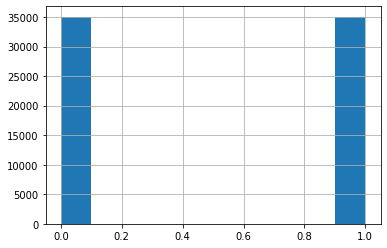

In [ ]:
y_train.hist()

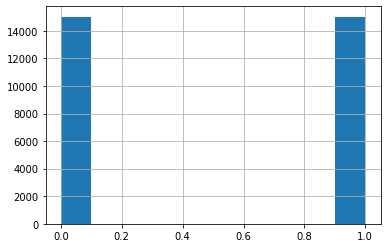

In [ ]:
y_test.hist()

Con esto ya tendríamos nuestros datos preparados para pasar a la fase de modelaje. Más adelante haremos el mismo ejercicio para los datos reales del caso de uso.

# Análisis exploratorio

Procederemos ahora a hacer un análisis exploratorio de los datos

En primer lugar, tal y como vemos en https://www.kaggle.com/fedesoriano/stroke-prediction-dataset y como ya hemos mencionado en la descripción de las columnas, "id" se corresponde a un identificador único. Vamos a comprobarlo:

In [ ]:
len(df["id"].unique())

5110

Lo que hemos hecho es coger la columna "id", extraer un vector con todos los valores únicos de tal columna y, finalmente, calcular la longitud de ese vector. Como podemos ver, esta longitud coincide con el número de filas, así que confirmamos que se trata de un identificador único. Esto implica que esta variable no puede utilizarse en el modelo de aprendizaje supervisado.

**NOTA**: Este criterio, descargar una columna cuando tiene tantos valores diferentes como filas, no puede utilizarse a la ligera. Una variable de tipo numérico es probable que no tenga valores repetidos y, aun así, puede aportar información. En este caso, lo hacemos porque sabemos que se trata simplemente de una etiqueta que no contiene ninguna información.

### Valores perdidos

Veamos ahora valores nulos o perdidos:

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


<Axes: >

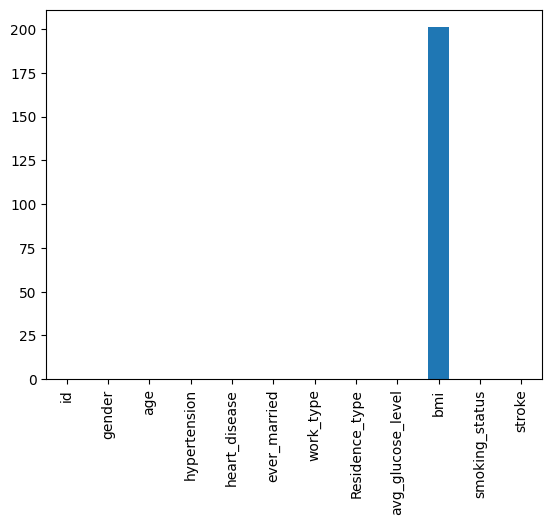

In [ ]:
df.isna().sum().plot(kind='bar')

Solo la columna "bmi" tiene valores perdidos. Trataremos esto luego.

### Variables numéricas

Veamos ahora con las variables numéricas, es decir, "age", "avg_glucose_level" y "bmi" (si bien "hypertension" y "heart_disease" son estrictamente números, conceptualmente es más razonable entenderlas como categóricas). Construimos sus histogramas y las correlaciones mutuas.

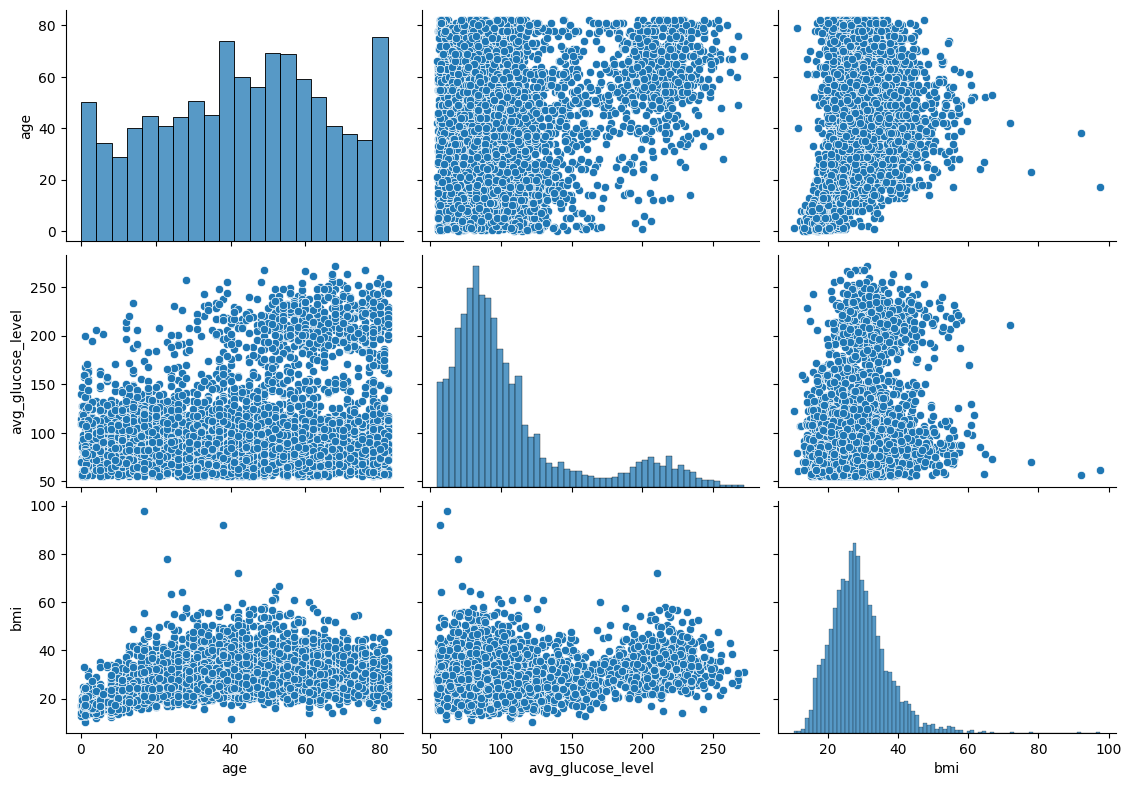

In [ ]:
list_numerical_variables = ["age", "avg_glucose_level", "bmi"]
fig_pairplot = sns.pairplot(df[list_numerical_variables])
fig_pairplot.fig.set_size_inches(12, 8)#Tamaño del gráfico: fig.set_size_inches(ancho=12,alto=8)

La función sns.pairplot() genera una cuadrícula de figuras. En las gráficas diagonales muestra los histogramas de las variables y en los elementos no diagonales dibuja unas variables en función de las otras.

Observando los histogramas, vemos que se trata de variables cuyos valores se distribuyen de forma más o menos regular en un cierto intervalo; dicho de otra forma, no nos encontramos con patrones extraños como distribuciones muy picadas en los extremos del rango de valores. Esto típicamente es positivo para los modelos de aprendizaje supervisado.

En las figuras en las que mostramos unos datos en función de los otros, por otra parte, no se aprecian claras correlaciones. Dicho de otro modo, podemos concluir que son independientes. En el caso en el que viéramos algún tipo de relación clara entre estas cantidades, estaríamos construyendo un modelo con información redundante. Para evitarlo, podríamos aplicar alguno de los algoritmos de aprendizaje no supervisado para reducir la dimensionalidad como por ejemplo un PCA (Principal Component Analysis).

### Variables categóricas

Nuestras variables categóricas son:
* "gender"
* "hypertension"
* "ever_married"
* "work_type"
* "Residence_type"
* "smoking_status"

Veamos qué valores toman y cómo se distribuyen estos:

In [ ]:
df["work_type"].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [ ]:
df["gender"].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


<Axes: title={'center': 'smoking_status'}>

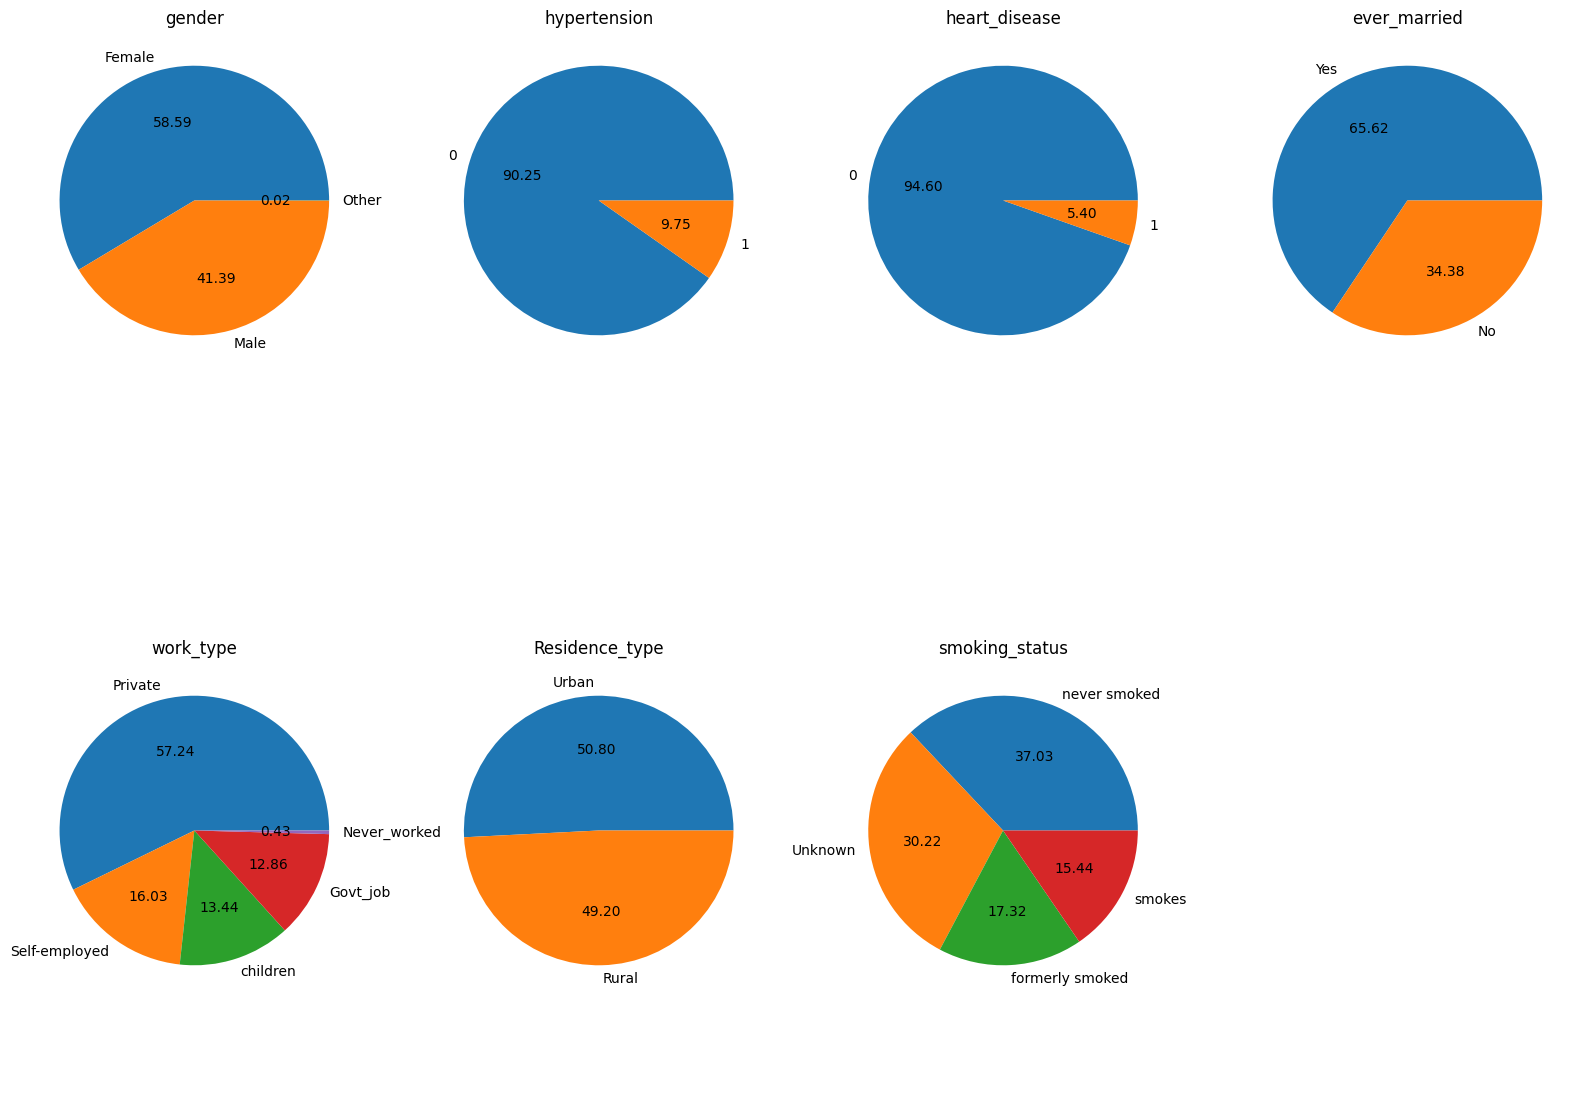

In [ ]:
fig, axes = plt.subplots(2,4)
#fig= Generar figura.
#axes= Cuadrícula de subgráficos con 2 filas y 4 columnas.
#plt.subplots(2,4) Vamos a elaborar 7 gráficos
axes[-1, -1].axis('off')#Dejar en blanco en la fila 2 la columna 4 por no tener un 8 gráfico
fig.set_size_inches(20, 15)#Tamaño de la figura: Ancho= 20, Alto=15
df["gender"].value_counts().rename("").plot.pie(autopct='%.2f', ax=axes[0,0], title="gender")
df["hypertension"].value_counts().rename("").plot.pie(autopct='%.2f', ax=axes[0,1], title="hypertension")
df["heart_disease"].value_counts().rename("").plot.pie(autopct='%.2f', ax=axes[0,2], title="heart_disease")
df["ever_married"].value_counts().rename("").plot.pie(autopct='%.2f', ax=axes[0,3], title="ever_married")
df["work_type"].value_counts().rename("").plot.pie(autopct='%.2f', ax=axes[1,0], title="work_type")
df["Residence_type"].value_counts().rename("").plot.pie(autopct='%.2f', ax=axes[1,1], title="Residence_type")
df["smoking_status"].value_counts().rename("").plot.pie(autopct='%.2f', ax=axes[1,2], title="smoking_status")

Para todas las variables categóricas, casi todos los valores posibles aparecen un buen número de veces, lo cual son buenas noticias. Las únicas excepciones son:
* "gender": La categoría "Other" (que podría corresponderse a una persona que no ha querido responder, a una persona transexual, simplemente se trata de un dato mal rellenado, etc.).
* "work_type": La categoría "Never_worked".

Al tratarse de categorías que aparecen un número de veces demasiado bajo, esto no va a tener demasiado impacto en la calidad de los modelos de aprendizaje supervisado que construyamos.

### Variable objetivo
Nuestra variable objetivo, "stroke", es también una variable categórica.

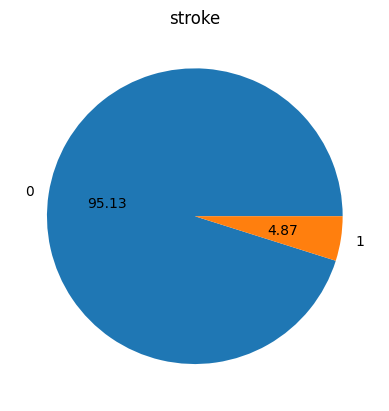

In [ ]:
df["stroke"].value_counts().rename("").plot.pie(autopct='%.2f', title="stroke");

Claramente tenemos un problema de clasificación muy desequilibrado. Esto es algo que hay que tener muy en cuenta en la fase de modelaje, sobre todo de cara a la métrica a elegir para validar tu modelo. La métrica más común es el accuracy:

$$
\begin{align}
&\text{Accuracy} = \frac{TP+TN}{TP+FN+FP+TN}
\end{align}
$$

- TP: True Positives
- FN: False Negatives
- FP: False Positives
- TN: True Negatives

NOTA: Un modelo que de forma sistemática siempre predice un 0, tendría un accuracy del 95% aproximadamente. ¿Podemos considerar esto un buen modelo? --> **¡¡¡¡NO!!!!**

![image.png](attachment:image.png)

En este sentido, y sin entrar en más detalle, cuál de las dos considerar, si [recall](https://en.wikipedia.org/wiki/Precision_and_recall) o [precision](https://en.wikipedia.org/wiki/Precision_and_recall), depende del problema. Otra posible métrica que combina el recall y precision es el [f-score](https://en.wikipedia.org/wiki/F-score).

### Filas duplicadas

Comprobemos si hay filas por duplicado. Excluimos la columna "id", ya que ya sabemos que tiene todo valores únicos.

In [ ]:
df.drop(columns="id").duplicated().any()

False

Vemos que no es el caso.

## Separación en entrenamiento y test
Separamos nuestros datos en entrenamiento y test. Notar que esto lo hacemos antes de realizar ninguna transformación sobre nuestros datos, ya que, de lo contrario, estaríamos utilizando información de nuestro conjunto de test para manipular el conjunto sobre el que entrenaremos los datos, lo que implicaría que estaríamos cometiendo "leakage".

Primero nos deshacemos de la columna "id" y tratamos por separado las columnas que harán como predictores y la variable objetivo en X e y. Mantenemos por el momento el resto de columnas de las que potencialmente vamos a prescindir ("Residence_type", "gender", etc.).

Además, ordenamos las columnas alfabéticamente ya que esto puede tener un pequeño impacto en el modelo.

In [ ]:
# Creamos la matriz de predictores
X = df.drop(columns=["id", "stroke"], inplace=False)

# Creamos la matriz de la variable objetivo
y = df.stroke

# Creamos nuestros conjuntos de entrenamiento y testeo (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4088, 10)
(1022, 10)


AxesSubplot(0.125,0.125;0.775x0.755)


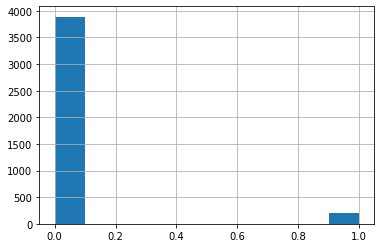

In [ ]:
print(y_train.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


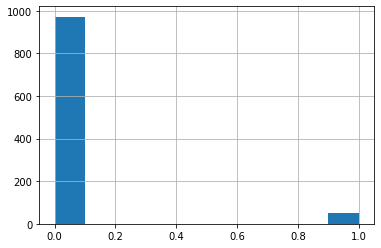

In [ ]:
print(y_test.hist())

En el siguiente paso procederemos a la limpieza de los datos.

## Limpieza de datos
Como hemos visto, todas las columnas están bien informadas excepto "bmi". Al tratarse de una variable numérica, podemos sustituir los valores perdidos por la media o la mediana, entre otras cosas. En este caso, nos quedaremos con la mediana.

Lo haremos con "SimpleImputer", una clase de sklearn que permite sustituir valores perdidos.

Ya de paso, le aplicamos la misma transformación al conjunto de test.

In [ ]:
# Creamos un SimpleImputer basado en la median (sklearn.impute.SimpleImputer)
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')#Creación del SimpleImputer
imp_median.fit(X_train[list_numerical_variables])#Utilizar fit para calcular la mediana de cada columna en el conjunto de datos de entrenamiento

# Aplicamos el SimpleImputer al conjunto train
array_X_train_numerical= imp_median.transform(X_train[list_numerical_variables])
X_train[list_numerical_variables] = pd.DataFrame(array_X_train_numerical, columns=list_numerical_variables, index=X_train.index)

# Aplicamos el SimpleImputer al conjunto test
array_X_test_numerical= imp_median.transform(X_test[list_numerical_variables])
X_test[list_numerical_variables] = pd.DataFrame(array_X_test_numerical, columns=list_numerical_variables, index=X_test.index)

In [ ]:
X_train['bmi']

,bmi
943,42.6
821,36.7
4675,21.8
3737,27.6
2067,49.8
5018,20.1
4663,32.2
3675,23.8
1987,24.9
2647,26.9


## Ingeniería de variables

En esta sección, veremos diferentes formas para hacer ingeniería de predictores. En este sentido, aplicaremos transformaciones interesantes a estas variables. En particular, en función del "bmi", podemos derivar una variable categórica que diga si la persona es delgada, normal, tiene sobrepeso o es obesa. Del mismo modo, en vez de considerar "avg_glucose_level", podemos tomar aplicar lo que se conoce como "binning", que es agrupar los distintos valores de la variable en pequeños grupos.

Por otro lado, necesitamos tratar con las variables categóricas. En el caso de las variables que toman dos valores ("ever_married", "hypertension" y "Residence_type") no consideraremos ninguna transformación. Para el resto aplicaremos "one-hot encoding", ya que no demasiados posibles valores diferentes.

### Variables numéricas

#### "bmi": categorización (inferencia)

Transformamos la variable "bmi" en una variable categórica "bmi_status". Utilizamos la siguiente fuente de información: https://www.cdc.gov/obesity/adult/defining.html, que muestra la siguiente relación:
* bmi < 18,5: delgadez.
* 18,5 <= bmi < 25: normal.
* 25 <= bmi < 30: sobrepeso.
* 30 <= bmi: obesidad.

Por lo tanto, definimos una variable categórica que recoge esta información con el objetivo de simplificar la detección de patrones por parte del algoritmo que queramos emplear. Esto es solamente un ejemplo. A pesar de que las ideas pueden parecer mejores o peores desde el punto de vista del sentido común y el conocimiento de negocio, finalmente serán el modelo y su salida los que determinarán la influencia positiva o negativa de las nuevas variables construídas.

In [ ]:
def introduce_bmi_status(X):
    X["bmi_status"] = "" #Creamos una nueva columna
    X.bmi_status.loc[X.bmi < 18.5] = "underweight"
    X.bmi_status.loc[(X.bmi >= 18.5) & (X.bmi < 25)] = "normal"
    X.bmi_status.loc[(X.bmi >= 25) & (X.bmi < 30)] = "overweight"
    X.bmi_status.loc[(X.bmi >= 30)] = "obesity"
    return X

X_train = introduce_bmi_status(X_train)
X_test  = introduce_bmi_status(X_test)

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_status
943,Female,75.0,0,0,Yes,Private,Urban,86.40,42.6,never smoked,obesity
821,Female,70.0,1,0,Yes,Govt_job,Rural,88.66,36.7,formerly smoked,obesity
4675,Male,8.0,0,0,No,children,Rural,63.43,21.8,Unknown,normal
3737,Female,73.0,0,0,Yes,Self-employed,Rural,98.69,27.6,Unknown,overweight
2067,Female,40.0,0,0,Yes,Self-employed,Rural,212.97,49.8,formerly smoked,obesity


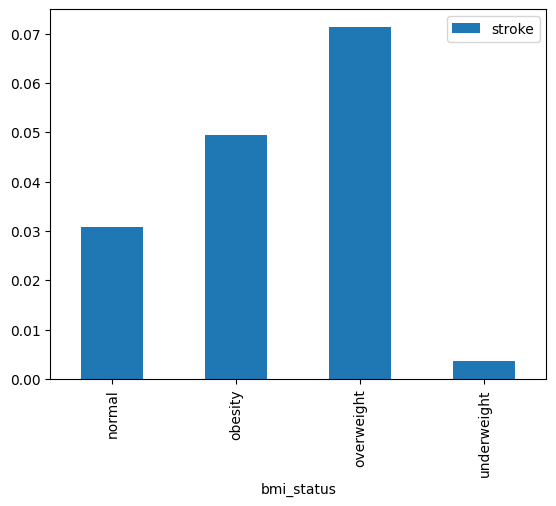

In [ ]:
pd.concat(objs=[X_train.bmi_status, y_train], axis=1).groupby(by="bmi_status").mean().plot(kind="bar");

Si usar "bmi_status" o "bmi" como predictor no está claro: si el algoritmo es lo suficientemente potente, entonces mejor "bmi"; si determinamos que el algoritmo está teniendo problemas a la hora de ajustar los datos, entonces mejor "bmi_status".

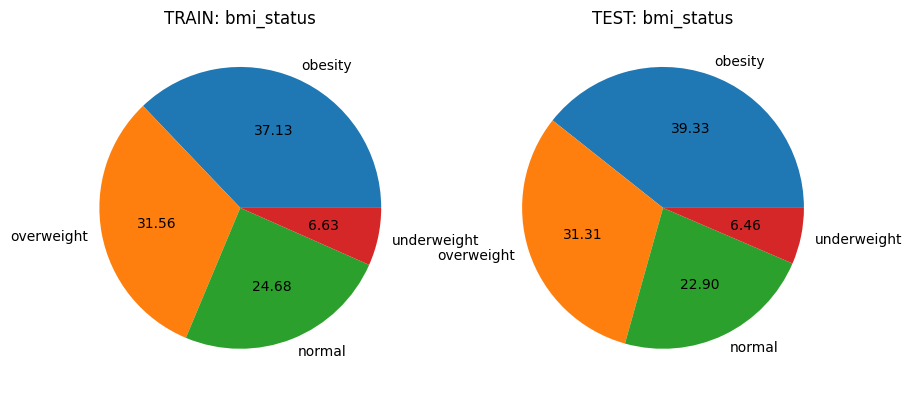

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
X_train["bmi_status"].value_counts().rename("").plot.pie(autopct='%.2f', ax=ax[0], title="TRAIN: bmi_status")
X_test["bmi_status"].value_counts().rename("").plot.pie(autopct='%.2f', ax=ax[1], title="TEST: bmi_status")
plt.show()

Podemos ver que la distribución de esta variable es muy similar en Train y en Test. Esto es positivo, puesto que la función del Train es representar un escenario generalizable y al extraer un subconjunto del mismo se tiene que el BMI sigue un patrón muy similar. Este patrón viene dado por una escasez clara de personas en situación de **delgadez** y una prevalencia de personas con **sobrepeso** y **obesidad** alarmantes puesto que representan aproximadamente el 70% de la muestra.

#### "age": *Inferencia de Variables*

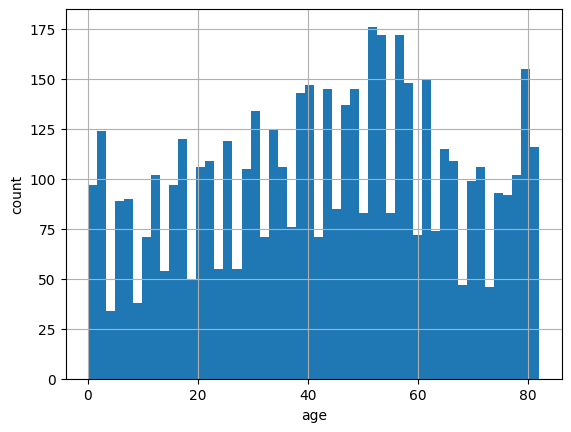

In [ ]:
df['age'].hist(bins=50)
plt.xlabel("age")
plt.ylabel('count');

El procedimiento es muy similar al llevado a cabo para *bmi_status*. Consiste en crear grupos de edad bajo el criterio:
* Niño (0): <15
* Estudiante (1): 15 <= age < 23
* Trabajador junior (2): 23 <= age < 33
* Trabajador senior (3): 33 <= age < 65
* Jubilado (4): age >= 65

In [ ]:
# Esta transformación, puesto que no hace uso de información sensible de leakage, se aplica por igual a train y a test.
X_train['age_group'], X_test['age_group'] = 0, 0 #Creamos columnas con valor 0

X_train.loc[X_train['age'].between(15, 23), ['age_group']] = 1
X_test.loc[X_test['age'].between(15, 23), ['age_group']] = 1

X_train.loc[X_train['age'].between(23, 33), ['age_group']] = 2
X_test.loc[X_test['age'].between(23, 33), ['age_group']] = 2

X_train.loc[X_train['age'].between(33, 65), ['age_group']] = 3
X_test.loc[X_test['age'].between(33, 65), ['age_group']] = 3

X_train.loc[X_train['age']>=65, ['age_group']] = 4
X_test.loc[X_test['age']>=65, ['age_group']] = 4

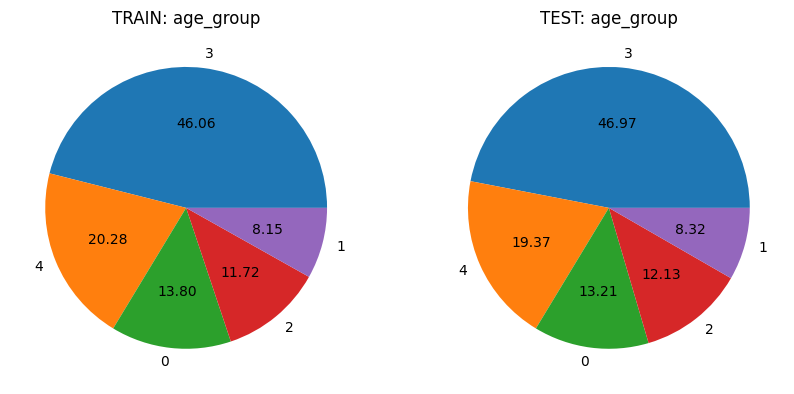

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
X_train["age_group"].value_counts().rename("").plot.pie(autopct='%.2f', ax=ax[0], title="TRAIN: age_group")
X_test["age_group"].value_counts().rename("").plot.pie(autopct='%.2f', ax=ax[1], title="TEST: age_group")
plt.show()

Como cabía esperar, el rango de edad correspondiente al centro de la gaussiana está sobrerrepresentado puesto que casi el 50% de la distribución se encuentra en este rango. Esto no quiere decir que esta categorización no sea apropiada. No obstante, en algunos casos nos interesa que la partición sea uniforme. Para ello, Python dispone de métodos que permiten hacer esto. Esto lo veremos a continuación.

#### age_group_unif

En Python, encontramos un método dentro de la librería `pandas` llamado `qcut` que utiliza un método de bucketización basado en cuartiles para asegurar así que todos los intervalos están equirrepresentados y evitar que haya tanta descompensación como en *age_group*.

In [ ]:
# 1. Crear intervalos usando qcut
result, bins = pd.qcut(X_train.age, q=5, retbins=True)
#Vamos a dividir en 5 quintiles el age_group
print(result.value_counts())#Con result, vemos la clasificación que ha hecho y el nª de datos que quedan agrupados
# 2. Ajustar los límites de los intervalos
bins= np.concatenate(([0], bins[1:-1], [np.inf]))#Bins son los límites de los intervalos
print(bins)
#Crear columna nueva, llamada age_group_unif, con los datos de pd.cut
X_train['age_group_unif'] = pd.cut(X_train.age, bins)
X_test['age_group_unif'] = pd.cut(X_test.age, bins)

age
(20.0, 38.0]     857
(51.0, 65.0]     852
(0.079, 20.0]    825
(65.0, 82.0]     782
(38.0, 51.0]     772
Name: count, dtype: int64
[ 0. 20. 38. 51. 65. inf]


In [ ]:
X_train['age_group_unif'].unique()

[(65.0, inf], (0.0, 20.0], (38.0, 51.0], (20.0, 38.0], (51.0, 65.0]]
Categories (5, interval[float64, right]): [(0.0, 20.0] < (20.0, 38.0] < (38.0, 51.0] <
                                           (51.0, 65.0] < (65.0, inf]]

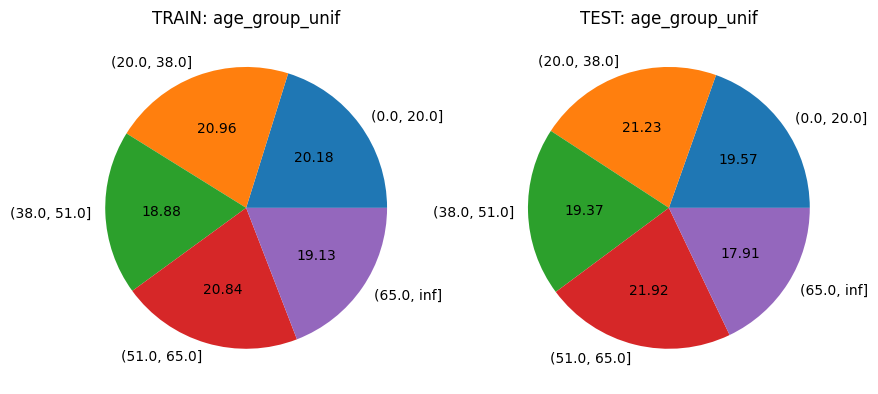

In [ ]:
fig, ax = plt.subplots(1, 2)#fig= Generar figura. Ax= 1 fila, 2 columnas
fig.set_size_inches(10, 5)#Tamaño de las figuras
X_train["age_group_unif"].value_counts().sort_index().rename("").plot.pie(autopct='%.2f', ax=ax[0], title="TRAIN: age_group_unif")
X_test["age_group_unif"].value_counts().sort_index().rename("").plot.pie(autopct='%.2f', ax=ax[1], title="TEST: age_group_unif")
plt.show()

#### "avg_glucose_level": *binning*

In [ ]:
X_train['avg_glucose_level'].min()

55.12

In [ ]:
X_train['avg_glucose_level'].max()

267.76

In [ ]:
float_glucose_min = X_train.avg_glucose_level.min()
float_glucose_max = X_train.avg_glucose_level.max()
int_bins = 40 #número de intervalos para los niveles de glucosa
#Crear los límites de los intervalos
array_bins = float_glucose_min + np.r_[0:int_bins + 1] * (float_glucose_max - float_glucose_min) / int_bins
#np.r_ = Crea un array que va desde 0 hasta 40+1
print(np.r_[0:int_bins + 1])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [ ]:
array_bins

array([ 55.12 ,  60.436,  65.752,  71.068,  76.384,  81.7  ,  87.016,
        92.332,  97.648, 102.964, 108.28 , 113.596, 118.912, 124.228,
       129.544, 134.86 , 140.176, 145.492, 150.808, 156.124, 161.44 ,
       166.756, 172.072, 177.388, 182.704, 188.02 , 193.336, 198.652,
       203.968, 209.284, 214.6  , 219.916, 225.232, 230.548, 235.864,
       241.18 , 246.496, 251.812, 257.128, 262.444, 267.76 ])

In [ ]:
def find_bin(x, array_bins):
    bool_larger = x > array_bins
    if bool_larger.any():
        return np.where(bool_larger)[0].max()
    else:
        return -1

X_train["avg_glucose_level_binned"] = X_train.avg_glucose_level.apply(find_bin, args=(array_bins,))
X_test["avg_glucose_level_binned"]  = X_test.avg_glucose_level.apply(find_bin, args=(array_bins,))

Una vez hecho el "binning", podemos representar la variable objetivo como función de esta nueva variable:

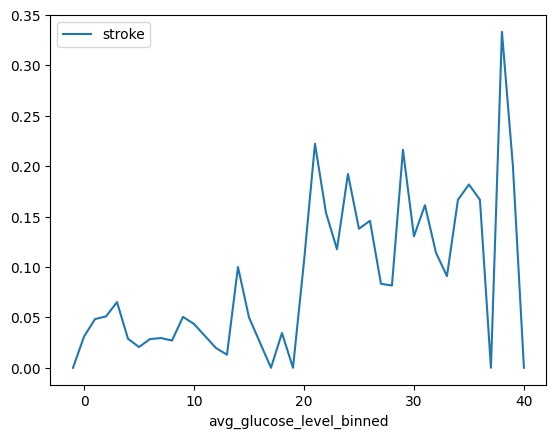

In [ ]:
pd.concat(objs=[X_train.avg_glucose_level_binned, y_train], axis=1).groupby(by="avg_glucose_level_binned").mean().plot();

#### Escalado y Normalización

Escalado vs. Normalización: ¿Cuál es la diferencia?

Una de las razones por las que es fácil confundirse entre el escalado y la normalización es porque los términos se utilizan a veces indistintamente y, para hacerlo aún más confuso, ¡son muy similares! En ambos casos, se transforman los valores de las variables numéricas para que los puntos de datos transformados tengan propiedades específicas. La diferencia es que en el escalado, se cambia el rango de los datos, mientras que en la normalización, se cambia la forma de la distribución de los datos.

**Escalado**

Consiste en transformar los datos para que se ajusten a una escala específica, como 0-100 o 0-1. Normalmente se escalan los datos cuando se utilizan métodos basados en medidas de la distancia entre puntos, como las máquinas de vector soporte (SVM) o K-Vecinos (KNN). Lo que se pretende con esto es que un cambio en cualquier variable numérica reciba la misma importancia.

Por ejemplo, es posible tener precios de productos en yenes y en dólares. Un dólar estadounidense equivale a unos 100 yenes, pero si no se escalan los precios, métodos como SVM o KNN considerarán que una diferencia de precio de 1 yen es tan importante como una diferencia de 1 dólar. Está claro que esto no encaja con nuestra intuición ni con la realidad. En el caso de unidades monetarias, se puede hacer el cambio entre divisas y tenerlo todo uniformizado. ¿Pero qué pasa si se trata de algo como la altura y el peso? No está del todo claro cuántos kilogramos deben equivaler a un metro.

Al escalar las variables, se hace factible la comparación entre distintas variables en igualdad de condiciones.

Por ejemplo, en nuestro caso tenemos las variables numéricas *avg_glucose_level* y *bmi*. Se trata de dos variables con distribuciones similares pero los valores de *avg_glucose_level* está entre 50 y 300 y *bmi* entre 0 y 100 aproximadamente. Si quisiéramos hacer comparaciones entre ambas o construir un modelo paramétrico como una regresión lineal, esta diferencia de escala podría afectar a los pesos del modelo y tener como resultado, por ejemplo, el enmascaramiento de las variables de menor escala.

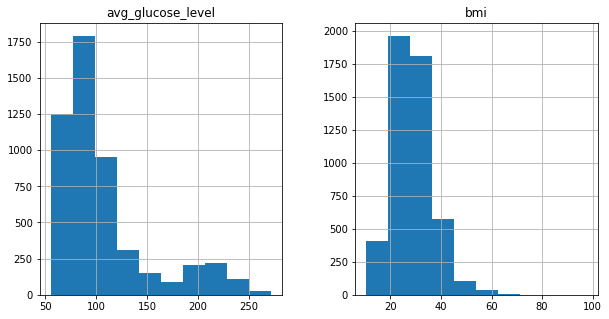

In [ ]:
df[['avg_glucose_level', 'bmi']].hist(figsize=(10, 5));

La normalización puede hacerse de manera que la variable se encuentre en el intervalo $[a, b]$, para ello se realiza la transformación siguiente:

$$
X_{std} = \dfrac{X - X_{min}}{X_{max} - X_{min}}
$$


$$
X_{sc} = X_{std} * (b - a) + a
$$

De esta manera, si deseamos que esté en el intervalo $[0, 1]$, sustituyendo $a$ y $b$ se tiene

$$
X_{sc} = \dfrac{X - X_{min}}{X_{max} - X_{min}}
$$

Esta transformación usa los valores máximo y mínimo del dataset. Si normalizamos antes de aplicar la separación entre *train* y *test* podemos cometer **data leakage** es decir, introducir información, a priori desconocida durante el entrenamiento (test), para transformar el conjunto de *train*. Es por ello que los valores de $X_{min}$ y $X_{max}$ deberán ser los del conjunto train. De esta manera, la transformación sobre el test será lícita.

In [ ]:
# Tranformación manual
X_train_sc0 = X_train[['avg_glucose_level', 'bmi']].copy()
X_test_sc0 = X_test[['avg_glucose_level', 'bmi']].copy()

# Calculamos los valores máximos y mínimos para el conjunto de entrenamiento
X_min0 = X_train_sc0.min(axis=0)
X_max0 = X_train_sc0.max(axis=0)

print("MÍNIMOS: \n{}\n\nMÁXIMOS: \n{}".format(X_min0, X_max0))

print("\n\n" + "-"*50)
print("TRANSFORMACIÓN")
print("-"*50 + "\n")

# Aplicamos la transformación a TRAIN y TEST
X_train_sc0.loc[:, :] = (X_train_sc0.values - X_min0.values) / (X_max0 - X_min0).values
X_test_sc0.loc[:, :] = (X_test_sc0.values - X_min0.values) / (X_max0 - X_min0).values

print("TRAIN")
print("\nMÍNIMOS: \n{}\n\nMÁXIMOS: \n{}".format(X_train_sc0.min(axis=0), X_train_sc0.max(axis=0)))

print("\nTEST")
print("\nMÍNIMOS: \n{}\n\nMÁXIMOS: \n{}".format(X_test_sc0.min(axis=0), X_test_sc0.max(axis=0)))

MÍNIMOS: 
avg_glucose_level    55.12
bmi                  11.30
dtype: float64

MÁXIMOS: 
avg_glucose_level    267.76
bmi                   97.60
dtype: float64


--------------------------------------------------
TRANSFORMACIÓN
--------------------------------------------------

TRAIN

MÍNIMOS: 
avg_glucose_level    0.0
bmi                  0.0
dtype: float64

MÁXIMOS: 
avg_glucose_level    1.0
bmi                  1.0
dtype: float64

TEST

MÍNIMOS: 
avg_glucose_level    0.000611
bmi                 -0.011587
dtype: float64

MÁXIMOS: 
avg_glucose_level    1.018717
bmi                  0.574739
dtype: float64


A pesar de que esta transformación se puede realizar de manera manual, la librería `sklearn` tiene una clase llamada [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) que nos permite hacerlo de manera mucho más sencilla además de tener los beneficios de integrabilidad en Pipelines de la librería entre otros.

In [ ]:
# Importamos la clase
from sklearn.preprocessing import MinMaxScaler

# Instanciamos el Scaler
mm = MinMaxScaler()

# Tranformación manual
X_train_sc0 = X_train[['avg_glucose_level', 'bmi']].copy()
X_test_sc0 = X_test[['avg_glucose_level', 'bmi']].copy()

# Entrenamos el Scaler sobre el conjunto de entrenamiento
mm.fit(X_train_sc0)

# El objeto 'mm' almacena los valores máximos y mínimos para hacer la transformación
X_min0 = pd.Series(mm.data_min_, index=X_train_sc0.columns)
X_max0 = pd.Series(mm.data_max_, index=X_train_sc0.columns)

print("MÍNIMOS: \n{}\n\nMÁXIMOS: \n{}".format(X_min0, X_max0))

print("\n\n" + "-"*50)
print("TRANSFORMACIÓN")
print("-"*50 + "\n")

# Aplicamos la transformación a TRAIN y TEST
X_train_sc0.loc[:, :] = mm.transform(X_train_sc0)
X_test_sc0.loc[:, :] = mm.transform(X_test_sc0)

print("TRAIN")
print("\nMÍNIMOS: \n{}\n\nMÁXIMOS: \n{}".format(X_train_sc0.min(axis=0), X_train_sc0.max(axis=0)))

print("\nTEST")
print("\nMÍNIMOS: \n{}\n\nMÁXIMOS: \n{}".format(X_test_sc0.min(axis=0), X_test_sc0.max(axis=0)))

MÍNIMOS: 
avg_glucose_level    55.12
bmi                  11.30
dtype: float64

MÁXIMOS: 
avg_glucose_level    267.76
bmi                   97.60
dtype: float64


--------------------------------------------------
TRANSFORMACIÓN
--------------------------------------------------

TRAIN

MÍNIMOS: 
avg_glucose_level    0.0
bmi                  0.0
dtype: float64

MÁXIMOS: 
avg_glucose_level    1.0
bmi                  1.0
dtype: float64

TEST

MÍNIMOS: 
avg_glucose_level    0.000611
bmi                 -0.011587
dtype: float64

MÁXIMOS: 
avg_glucose_level    1.018717
bmi                  0.574739
dtype: float64


In [ ]:
X_train_sc0.head()

,avg_glucose_level,bmi
943,0.147103,0.362688
821,0.157731,0.294322
4675,0.039080,0.121669
3737,0.204900,0.188876
2067,0.742334,0.446118


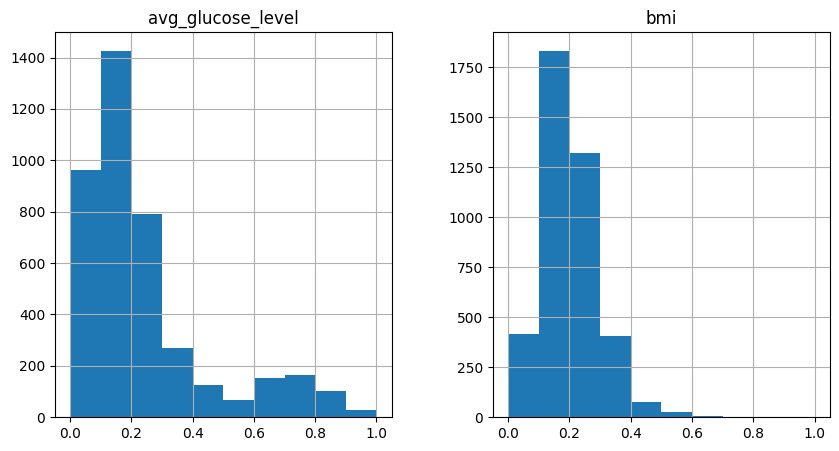

In [ ]:
X_train_sc0[['avg_glucose_level', 'bmi']].hist(figsize=(10, 5));

Como podemos observar, **las distribuciones son invariantes bajo escalado**. Por ejemplo,si una variable sigue una distribución de Poisson, su transformada continuará perteneciendo a esta familia.

**Normalización**


El escalado sólo cambia el rango de los datos. La normalización es una transformación más radical. El objetivo de la normalización es cambiar las observaciones para que puedan describirse como una distribución normal.

**Distribución normal**: También conocida como "campana de Gauss", se trata de una distribución estadística específica en la que un número aproximadamente igual de observaciones cae por encima y por debajo de la media, la media y la mediana son iguales, y las observaciones se acumulan en torno a la media. La distribución normal también se conoce como distribución gaussiana.

En general, se normalizarán los datos si se va a utilizar una técnica de aprendizaje automático o estadística que asume que sus datos están distribuidos normalmente. Algunos ejemplos son el análisis discriminante lineal (LDA) y o Gaussian Naive Bayes.

Los métodos de normalización más frecuentes son:
   
  * **Box-Cox (no lineal)**: Una transformación de Box Cox es una transformación de una variable dependiente no normal en una forma normal. La normalidad es un supuesto importante para muchas técnicas estadísticas; si sus datos no son normales, la aplicación de una Box-Cox le permitirá realizar un mayor número de pruebas. La transformación de Box Cox debe su nombre a los estadísticos George Box y Sir David Roxbee Cox, que colaboraron en un artículo de 1964 y desarrollaron la técnica.


  * **Estandarización (lineal)**: En estadística, la puntuación estándar es el número de desviaciones estándar en las que el valor de un punto está por encima o por debajo del valor medio de lo que se observa o mide. Las medidas por encima de la media tienen puntuaciones estándar positivas, mientras que las que están por debajo de la media tienen puntuaciones estándar negativas. De esta manera, se tienen valores adimensionales de media 0 y desviación estándar 1.
  
$$
Z = \dfrac{X - \mu}{\sigma}
$$

   Donde $\mu$ y $\sigma$ hacen referencia a la media poblacional de la distribución, que en la práctica se estiman por sus valores muestrales.

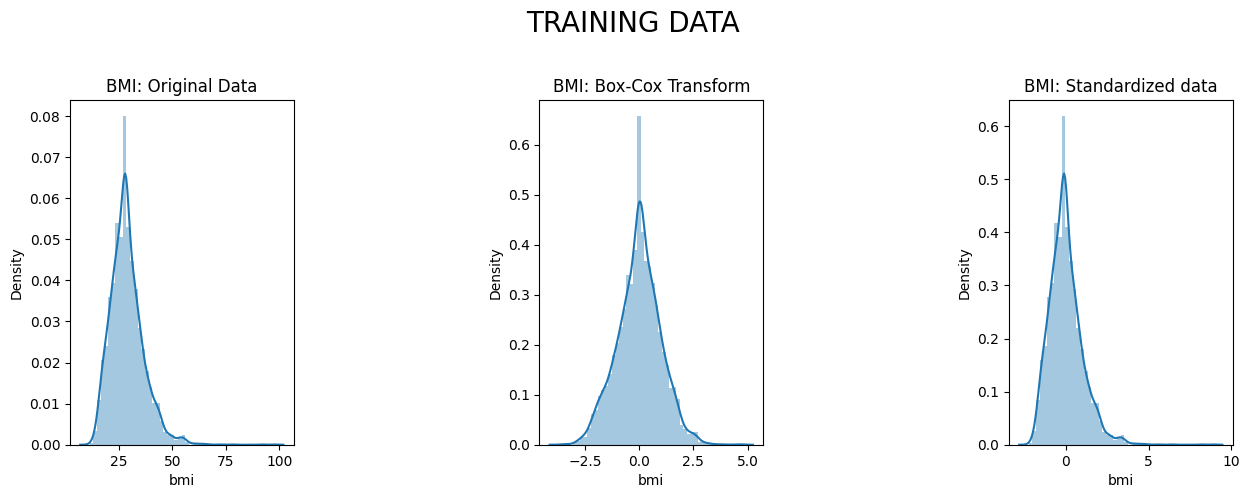

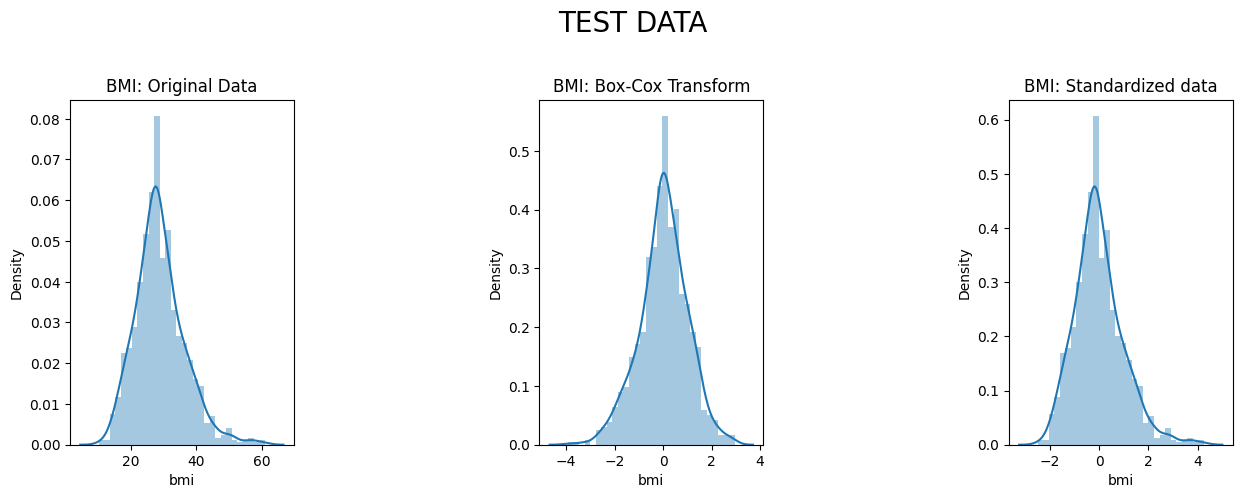

In [ ]:
# Importamos los transformers de sklearn pertinentes
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Instanciamos los scalers
sc = StandardScaler()
pt = PowerTransformer(method='box-cox')

X_train_sc1 = X_train[['avg_glucose_level', 'bmi']].copy()
X_test_sc1 = X_test[['avg_glucose_level', 'bmi']].copy()

# Normalizamos train y test usando Box-Cox
normalized_data = pt.fit_transform(X_train_sc1[['bmi']])
normalized_data_test = pt.transform(X_test_sc1[['bmi']])

# Estandarizamos train y test
standardized_data = sc.fit_transform(X_train_sc1[['bmi']])
standardized_data_test = sc.fit_transform(X_test_sc1[['bmi']])

# Representamos las transformaciones sobre el TRAIN
fig, ax=plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(X_train_sc1.bmi, ax=ax[0])
ax[0].set_title("BMI: Original Data")

sns.distplot(normalized_data, ax=ax[1])
ax[1].set_title("BMI: Box-Cox Transform")
ax[1].set_xlabel('bmi')

sns.distplot(standardized_data[:, 0], ax=ax[2])
ax[2].set_title("BMI: Standardized data")
ax[2].set_xlabel('bmi')

fig.suptitle("TRAINING DATA", fontsize='20')
fig.subplots_adjust(left=None, bottom=None, right=None, top=.8, wspace=1.1)
plt.show()

# Representamos las transformaciones sobre el TEST
fig, ax=plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(X_test_sc1.bmi, ax=ax[0])
ax[0].set_title("BMI: Original Data")

sns.distplot(normalized_data_test, ax=ax[1])
ax[1].set_title("BMI: Box-Cox Transform")
ax[1].set_xlabel('bmi')

sns.distplot(standardized_data_test[:, 0], ax=ax[2])
ax[2].set_title("BMI: Standardized data")
ax[2].set_xlabel('bmi')

fig.suptitle("TEST DATA", fontsize='20')
fig.subplots_adjust(left=None, bottom=None, right=None, top=.8, wspace=1.1)
plt.show()

### Variables categóricas

In [ ]:
list_columns_to_ohe = ["gender", "work_type", "smoking_status"]

ohencoder = ce.OneHotEncoder(cols=list_columns_to_ohe, use_cat_names=True)

X_train = ohencoder.fit_transform(X_train)
X_test = ohencoder.transform(X_test)

NameError: name 'ce' is not defined

Veamos cómo ha quedado ahora nuestro conjunto de datos. En particular, veamos en qué se han transformado las columnas "gender", "work_type" y "smoking_status":

In [ ]:
X_train.filter(regex="^gender_").head()

,gender_Female,gender_Male
943,1,0
821,1,0
4675,0,1
3737,1,0
2067,1,0


In [ ]:
X_train.filter(regex="^work_type_").head()

,work_type_Private,work_type_Govt_job,work_type_children,work_type_Self-employed,work_type_Never_worked
943,1,0,0,0,0
821,0,1,0,0,0
4675,0,0,1,0,0
3737,0,0,0,1,0
2067,0,0,0,1,0


In [ ]:
X_train.filter(regex="^smoking_status_").head()

,smoking_status_never smoked,smoking_status_formerly smoked,smoking_status_Unknown,smoking_status_smokes
943,1,0,0,0
821,0,1,0,0
4675,0,0,1,0
3737,0,0,1,0
2067,0,1,0,0


Como vemos, tenemos una columna para cada uno de los valores, a la par que nos ha eliminado las columnas originales.

Notar que en el caso de "gender" no aparece la columna "gender_Other", si bien la categoría "Other" estaba entre los valores de "gender". Se debe a que "Other" ha caído en el conjunto de test. Esto no es preocupante, al tratarse de algo marginal.